<center><h1>Simple Linear Regression</h1></center>

<br><h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_data">Import the Data</a></li>
        <li><a href="#prepare_data">Prepare the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#simple_regression">Simple Regression Model</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

<h2>Import the Data</h2>

In [1]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

In [2]:
#import the data
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<br><br><br><h2>Prepare the Data</h2>

In [3]:
#describtion of given data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#information about given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [6]:
#finding missing values
missing_data = df.isnull()

for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")

ENGINESIZE
False    1067
Name: ENGINESIZE, dtype: int64

CYLINDERS
False    1067
Name: CYLINDERS, dtype: int64

FUELCONSUMPTION_CITY
False    1067
Name: FUELCONSUMPTION_CITY, dtype: int64

FUELCONSUMPTION_HWY
False    1067
Name: FUELCONSUMPTION_HWY, dtype: int64

FUELCONSUMPTION_COMB
False    1067
Name: FUELCONSUMPTION_COMB, dtype: int64

FUELCONSUMPTION_COMB_MPG
False    1067
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64

CO2EMISSIONS
False    1067
Name: CO2EMISSIONS, dtype: int64



No missing_data for given data, so let move on next step.


<h2>Data Exploration</h2> 
<h3>Descriptive Statistical Analysis</h3>

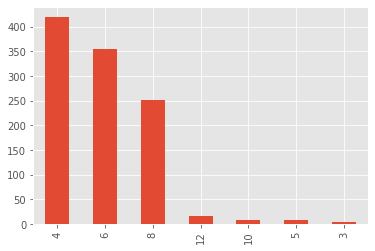

In [7]:
df['CYLINDERS'].value_counts().plot(kind='bar')

In [8]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


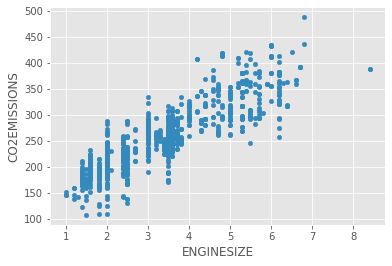

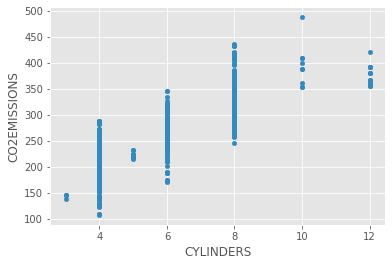

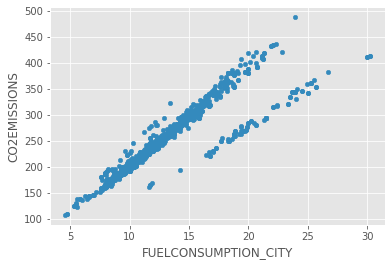

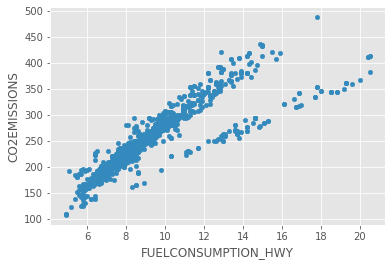

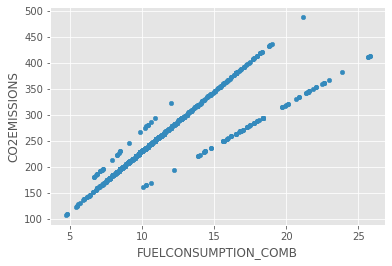

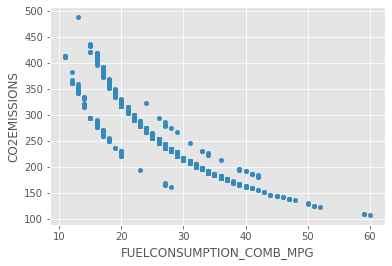

In [9]:
#engine size ve co2 emission
df.plot(kind='scatter', x='ENGINESIZE', y='CO2EMISSIONS')
df.plot(kind='scatter', x='CYLINDERS', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS')
plt.show()

We don't consider unrelevent data point in linear regression.<br>
Eg: Fuel consumption_comp_mpg is non- linear<br> 
so we decided to not consider for Fuel consumption_comp_mpg

In [10]:
df.drop('FUELCONSUMPTION_COMB_MPG', axis=1, inplace=True)

In [11]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


<br><br><br><h2>Simple Linear Regression Model</h2>


Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

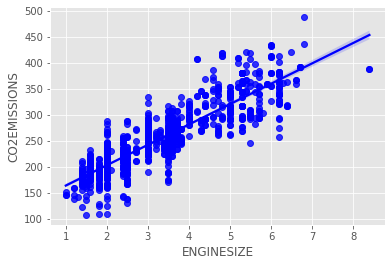

In [18]:
#train data distribution

sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df, color='blue')

enginesize is a good predictor for predict the co2 emission.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

#split the data
split_data = np.random.rand(len(df)) < 0.8
train = df[split_data]
test = df[~split_data]

train_X = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#define the model
reg = linear_model.LinearRegression()
reg.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
#co-efficient
reg.coef_

array([[39.10104104]])

In [26]:
#imtercept
reg.intercept_

array([124.91158682])


 Coefficient and Intercept in the simple linear regression, are the parameters of the fit line.

Text(0, 0.5, 'Emission')

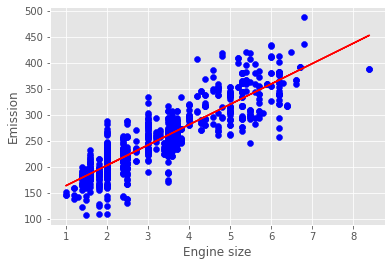

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_X, reg.coef_[0][0]*train_X + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

<br><br><br><h2>Evaluation</h2>

In [28]:
test_X = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#prediction
pred = reg.predict(test_X)

#calculate the accuracy score and r2 score
print("Mean absolute error: %.2f" % np.mean(np.absolute(pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(pred , test_y) )

Mean absolute error: 23.32
Residual sum of squares (MSE): 916.30
R2-score: 0.64


<br><br><br>

End of the notebook...